<a href="https://colab.research.google.com/github/likhi-23/Heart-disease-prediction/blob/main/Anomaly_detection_unsw_nb15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
    
<h1 style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:150%"><b> Table of contents </b></h1>

 - [**Introduction**](#1)

 - [**Import and Set Up**](#2)

 - [**Pre-processing and feature selection**](#3)
    
 - [**Modelling and Evaluation**](#4)
    - [**Logistical Classification**](#4_1)
    - [**kNN**](#4_2)
    - [**Decision Tree**](#4_3)
    - [**Extra Trees**](#4_4)
    - [**Random Forest**](#4_5)
    - [**Gradient Boosting Classifier**](#4_6)
    - [**Neural Network MLP**](#4_7)
    - [**Neural Network MLP (Keras)**](#4_8)
    - [**GRU (Keras)**](#4_9)
    - [**LSTM (Keras)**](#4_10)
    
 - [**Evaluate**](#5)
 - [**Federated Learning**](#6)
   

<a id='2'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Import and Set up</b>

In [ ]:
import numpy as np
import pandas as pd

from IPython.core.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio


import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import warnings

# Configure Jupyter Notebook
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.expand_frame_repr', False)
# pd.set_option('max_colwidth', -1)
display(HTML("<style>div.output_scroll { height: 35em; }</style>"))

reload(plt)
%matplotlib inline
%config InlineBackend.figure_format ='retina'

warnings.filterwarnings('ignore')

# configure plotly graph objects
pio.renderers.default = 'iframe'
# pio.renderers.default = 'vscode'

pio.templates["ck_template"] = go.layout.Template(
    layout_colorway = px.colors.sequential.Viridis,
#     layout_hovermode = 'closest',
#     layout_hoverdistance = -1,
    layout_autosize=False,
    layout_width=800,
    layout_height=600,
    layout_font = dict(family="Calibri Light"),
    layout_title_font = dict(family="Calibri"),
    layout_hoverlabel_font = dict(family="Calibri Light"),
#     plot_bgcolor="white",
)

# pio.templates.default = 'seaborn+ck_template+gridon'
pio.templates.default = 'ck_template+gridon'
# pio.templates.default = 'seaborn+gridon'
# pio.templates

In [ ]:
df1 = pd.read_csv('/kaggle/input/unsw-nb15/UNSW_NB15_training-set.csv')
df2 = pd.read_csv('/kaggle/input/unsw-nb15/UNSW_NB15_testing-set.csv')
df = pd.concat([df1,df2], ignore_index=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  si

In [ ]:
df.head(10)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.09020,254,0,1.803636e+08,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.00030,254,0,8.810000e+08,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.00510,254,0,8.544000e+08,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.66080,254,0,6.000000e+08,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.00250,254,0,8.504000e+08,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
5,6,0.000003,udp,-,INT,2,0,784,0,333333.32150,254,0,1.045333e+09,0.0,0,0,0.003,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,392,0,0,0,2,2,2,2,1,2,0,0,0,2,2,0,Normal,0
6,7,0.000006,udp,-,INT,2,0,1960,0,166666.66080,254,0,1.306667e+09,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,980,0,0,0,2,2,2,2,1,2,0,0,0,2,2,0,Normal,0
7,8,0.000028,udp,-,INT,2,0,1384,0,35714.28522,254,0,1.977143e+08,0.0,0,0,0.028,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,692,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0
8,9,0.000000,arp,-,INT,1,0,46,0,0.00000,0,0,0.000000e+00,0.0,0,0,60000.688,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,46,0,0,0,2,2,2,2,2,2,0,0,0,2,2,1,Normal,0
9,10,0.000000,arp,-,INT,1,0,46,0,0.00000,0,0,0.000000e+00,0.0,0,0,60000.712,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,46,0,0,0,2,2,2,2,2,2,0,0,0,2,2,1,Normal,0


In [ ]:
df.describe(include='all')

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
count,257673.000000,257673.000000,257673,257673,257673,257673.000000,257673.000000,2.576730e+05,2.576730e+05,2.576730e+05,257673.000000,257673.000000,2.576730e+05,2.576730e+05,257673.000000,257673.000000,257673.000000,257673.000000,2.576730e+05,257673.000000,257673.000000,2.576730e+05,2.576730e+05,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,2.576730e+05,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673,257673.000000
unique,NaN,NaN,133,13,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
top,NaN,NaN,tcp,-,FIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN
freq,NaN,NaN,123041,141321,117164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93000,NaN
mean,72811.823858,1.246715,NaN,NaN,NaN,19.777144,18.514703,8.572952e+03,1.438729e+04,9.125391e+04,180.000931,84.754957,7.060869e+07,6.582143e+05,4.889317,6.743691,912.300834,98.915462,5.419373e+03,582.251456,121.753661,1.006120e+09,1.002295e+09,119.254629,0.046038,0.023652,0.022386,137.639027,121.649703,0.102242,1.968900e+03,9.383176,1.324978,6.050467,5.238271,4.032677,8.322964,0.012819,0.012850,0.132005,6.800045,9.121049,0.014274,NaN,0.639077
std,48929.917641,5.974305,NaN,NaN,NaN,135.947152,111.985965,1.737739e+05,1.461993e+05,1.603446e+05,102.488268,112.762131,1.857313e+08,2.412372e+06,65.574953,53.702222,6922.153239,1094.048691,4.903450e+04,3930.153369,127.367443,1.367795e+09,1.363877e+09,127.230477,0.092908,0.053856,0.045771,205.901118,254.041013,0.710593,4.962523e+04,10.829706,0.992300,8.173749,8.160822,5.831515,11.120754,0.116091,0.116421,0.681854,8.396266,10.874752,0.118618,NaN,0.480269
min,1.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,NaN,0.000000
25%,32210.000000,0.000008,NaN,NaN,NaN,2.000000,0.000000,1.140000e+02,0.000000e+00,3.078928e+01,62.000000,0.000000,1.231800e+04,0.000000e+00,0.000000,0.000000,0.008000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000e+00,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,NaN,0.000000
50%,64419.000000,0.004285,NaN,NaN,NaN,4.000000,2.000000,5.280000e+02,1.780000e+02,2.955665e+03,254.000000,29.000000,7.439423e+05,1.747441e+03,0.000000,0.000000,0.381696,0.007000,6.736370e-01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,73.000000,44.000000,0.000000,0.000000e+00,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,NaN,1.000000
75%,110923.000000,0.685777,NaN,NaN,NaN,12.000000,10.000000,1.362000e+03,1.064000e+03,1.250000e+05,254.000000,252.000000,8.000000e+07,2.210538e+04,3.000000,2.000000,58.094727,56.438859,2.787367e+03,119.712937,255.000000,2.007375e+09,1.992752e+09,255.000000,

<a id='3'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Pre-processing and Feature Selection</b>

The data quality report was generated for Post Block Assignment 1. This section will process and select the features in accordance with the recommendations of that report.

## Drop irrelevant or excess feastures

The first feature to drop is 'id'. This feature is an index and not descriptive.

The second feature to drop is 'attack_cat'. This feature is an extension of the target feature, therefore using it will give us 100% predictions but will not give us a generalizable model.

The other features to be dropped are those that were too strongly correlated. In this current version none of them were dropped, as the model is first evaluated to see how well it can perform.

In [ ]:
list_drop = ['id','attack_cat']

In [ ]:
df.drop(list_drop,axis=1,inplace=True)

## Apply Clamping

The extreme values should be pruned to reduce the skewness of some distributions. The logic applied here is that the features with a maximum value more than ten times the median value is pruned to the 95th percentile. If the 95th percentile is close to the maximum, then the tail has more interesting information than what we want to discard.

The clamping is also only applied to features with a maximum of more than 10 times the median. This prevents the bimodals and small value distributions from being excessively pruned.  

In [ ]:
# Clamp extreme Values
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe(include='all')

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,257673.000000,257673.000000,257673.000000,2.576730e+05,2.576730e+05,2.576730e+05,257673.000000,257673.000000,2.576730e+05,2.576730e+05,257673.000000,257673.000000,257673.000000,257673.000000,2.576730e+05,257673.000000,257673.000000,2.576730e+05,2.576730e+05,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,2.576730e+05,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000
mean,1.246715,19.777144,18.514703,8.572952e+03,1.438729e+04,9.125391e+04,180.000931,84.754957,7.060869e+07,6.582143e+05,4.889317,6.743691,912.300834,98.915462,5.419373e+03,582.251456,121.753661,1.006120e+09,1.002295e+09,119.254629,0.046038,0.023652,0.022386,137.639027,121.649703,0.102242,1.968900e+03,9.383176,1.324978,6.050467,5.238271,4.032677,8.322964,0.012819,0.012850,0.132005,6.800045,9.121049,0.014274,0.639077
std,5.974305,135.947152,111.985965,1.737739e+05,1.461993e+05,1.603446e+05,102.488268,112.762131,1.857313e+08,2.412372e+06,65.574953,53.702222,6922.153239,1094.048691,4.903450e+04,3930.153369,127.367443,1.367795e+09,1.363877e+09,127.230477,0.092908,0.053856,0.045771,205.901118,254.041013,0.710593,4.962523e+04,10.829706,0.992300,8.173749,8.160822,5.831515,11.120754,0.116091,0.116421,0.681854,8.396266,10.874752,0.118618,0.480269
min,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.078928e+01,62.000000,0.000000,1.231800e+04,0.000000e+00,0.000000,0.000000,0.008000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000e+00,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,0.004285,4.000000,2.000000,5.280000e+02,1.780000e+02,2.955665e+03,254.000000,29.000000,7.439423e+05,1.747441e+03,0.000000,0.000000,0.381696,0.007000,6.736370e-01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,73.000000,44.000000,0.000000,0.000000e+00,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,0.685777,12.000000,10.000000,1.362000e+03,1.064000e+03,1.250000e+05,254.000000,252.000000,8.000000e+07,2.210538e+04,3.000000,2.000000,58.094727,56.438859,2.787367e+03,119.712937,255.000000,2.007375e+09,1.992752e+09,255.000000,0.082082,0.036842,0.044665,100.000000,89.000000,0.000000,0.000000e+00,12.000000,2.000000,6.000000,4.000000,3.000000,8.000000,0.000000,0.000000,0.000000,8.000000,11.000000,0.000000,1.000000
max,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,2.242273e+07,5319.000000,5507.000000,84371.496000,57739.240000,1.483831e+06,463199.240100,255.000000,4.294959e+09,4.294882e+09,255.000000,3.821465,3.226788,2.928778,1504.000000,1500.000000,172.000000,6.558056e+06,63.000000,6.000000,59.000000,59.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


In [ ]:
DEBUG =0

for feature in df_numeric.columns:
    if DEBUG == 1:
        print(feature)
        print('max = '+str(df_numeric[feature].max()))
        print('75th = '+str(df_numeric[feature].quantile(0.95)))
        print('median = '+str(df_numeric[feature].median()))
        print(df_numeric[feature].max()>10*df_numeric[feature].median())
        print('----------------------------------------------------')
    if df_numeric[feature].max()>10*df_numeric[feature].median() and df_numeric[feature].max()>10 :
        df[feature] = np.where(df[feature]<df[feature].quantile(0.95), df[feature], df[feature].quantile(0.95))

In [ ]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe(include='all')

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,2.576730e+05,2.576730e+05,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,2.576730e+05,2.576730e+05,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000
mean,0.456516,12.327372,9.855747,1668.298689,3219.398486,77959.930882,180.000931,84.754957,5.110515e+07,3.477517e+05,2.180974,2.956693,37.158635,30.909571,1759.611714,234.711374,121.753661,9.945511e+08,9.906237e+08,119.254629,0.046038,0.023652,0.022386,123.076155,109.314292,0.098660,9.679225,9.114517,1.324978,5.658528,4.861627,3.879448,8.051511,0.012819,0.012850,0.098652,6.382822,8.857366,0.014274,0.639077
std,0.759088,16.861516,16.471114,3197.276145,8361.316057,106754.703097,102.488268,112.762131,7.666502e+07,9.740522e+05,3.265256,6.008834,61.852646,50.163202,2852.886830,651.083756,127.367443,1.342271e+09,1.338062e+09,127.230477,0.092908,0.053856,0.045771,145.047115,207.972476,0.298205,37.080850,10.058965,0.992300,6.866560,6.864614,5.367192,10.333915,0.116091,0.116421,0.298195,7.084512,10.116552,0.118618,0.480269
min,0.000000,1.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,114.000000,0.000000,30.789277,62.000000,0.000000,1.231800e+04,0.000000e+00,0.000000,0.000000,0.008000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,0.004285,4.000000,2.000000,528.000000,178.000000,2955.664893,254.000000,29.000000,7.439423e+05,1.747441e+03,0.000000,0.000000,0.381696,0.007000,0.673637,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,73.000000,44.000000,0.000000,0.000000,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,0.685777,12.000000,10.000000,1362.000000,1064.000000,125000.000300,254.000000,252.000000,8.000000e+07,2.210538e+04,3.000000,2.000000,58.094727,56.438859,2787.367296,119.712937,255.000000,2.007375e+09,1.992752e+09,255.000000,0.082082,0.036842,0.044665,100.000000,89.000000,0.000000,0.000000,12.000000,2.000000,6.000000,4.000000,3.000000,8.000000,0.000000,0.000000,0.000000,8.000000,11.000000,0.000000,1.000000
max,2.811414,62.000000,62.000000,13454.000000,33044.000000,333333.321500,255.000000,254.000000,2.666667e+08,3.965441e+06,12.000000,24.000000,228.630005,162.880112,9528.481192,2776.853236,255.000000,3.835956e+09,3.829021e+09,255.000000,3.821465,3.226788,2.928778,638.000000,769.400000,1.000000,159.000000,34.000000,6.000000,25.000000,25.000000,17.000000,34.000000,4.000000,4.000000,1.000000,25.000000,34.000000,1.000000,1.000000


## Apply log function to nearly all numeric, since they are all mostly skewed to the right

It would have been too much of a slog to apply the log function individually, therefore a simple rule has been set up: if the number of unique values in the continuous feature is more than 50 then apply the log function. The reason more than 50 unique values are sought is to filter out the integer based features that act more categorically.  

In [ ]:
df_numeric = df.select_dtypes(include=[np.number])
df_before = df_numeric.copy()
DEBUG = 0
for feature in df_numeric.columns:
    if DEBUG == 1:
        print(feature)
        print('nunique = '+str(df_numeric[feature].nunique()))
        print(df_numeric[feature].nunique()>50)
        print('----------------------------------------------------')
    if df_numeric[feature].nunique()>50:
        if df_numeric[feature].min()==0:
            df[feature] = np.log(df[feature]+1)
        else:
            df[feature] = np.log(df[feature])

df_numeric = df.select_dtypes(include=[np.number])

## Reduce the labels in catagorical features

Some features have very high cardinalities, and this section reduces the cardinality to 5 or 6 per feature. The logic is to take the top 5 occuring labels in the feature as the labels and set the remainder to '-' (seldom used) labels. When the encoding is done later on, the dimensionality will not explode and cause the curse of dimensionality.

In [ ]:
df_cat = df.select_dtypes(exclude=[np.number])
df_cat.describe(include='all')

,proto,service,state
count,257673,257673,257673
unique,133,13,11
top,tcp,-,FIN
freq,123041,141321,117164


In [ ]:
DEBUG = 0
for feature in df_cat.columns:
    if DEBUG == 1:
        print(feature)
        print('nunique = '+str(df_cat[feature].nunique()))
        print(df_cat[feature].nunique()>6)
        print(sum(df[feature].isin(df[feature].value_counts().head().index)))
        print('----------------------------------------------------')

    if df_cat[feature].nunique()>6:
        df[feature] = np.where(df[feature].isin(df[feature].value_counts().head().index), df[feature], '-')

In [ ]:
df_cat = df.select_dtypes(exclude=[np.number])
df_cat.describe(include='all')

,proto,service,state
count,257673,257673,257673
unique,6,5,6
top,tcp,-,FIN
freq,123041,149701,117164


In [ ]:
df['proto'].value_counts().head().index

Index(['tcp', 'udp', '-', 'unas', 'arp'], dtype='object')

In [ ]:
df['proto'].value_counts().index

Index(['tcp', 'udp', '-', 'unas', 'arp', 'ospf'], dtype='object')

## View before and after of features

This section simply displays the distributions within features before and after the transformations.  

## Best Features

This section does an analysis (univariate statistical tests) to determine which features best predict the target feature.

In [ ]:
# Feature Selection
from sklearn.feature_selection import SelectKBest, chi2

best_features = SelectKBest(score_func=chi2,k='all')

X = df.iloc[:,4:-2]
y = df.iloc[:,-1]
fit = best_features.fit(X,y)

df_scores=pd.DataFrame(fit.scores_)
df_col=pd.DataFrame(X.columns)

feature_score=pd.concat([df_col,df_scores],axis=1)
feature_score.columns=['feature','score']
feature_score.sort_values(by=['score'],ascending=True,inplace=True)

fig = go.Figure(go.Bar(
            x=feature_score['score'][0:21],
            y=feature_score['feature'][0:21],
            orientation='h'))

fig.update_layout(title="Top 20 Features",
                  height=1200,
                  showlegend=False,
                 )

fig.show()

## Encode categorical features

The categorical features must be encoded to ensure that the models can interpret them. One-hot encoding is used since none of the categorical features are ordinal.  

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
X.head()
feature_names = list(X.columns)
np.shape(X)

(257673, 42)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2,3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
np.shape(X)

(257673, 56)

In [ ]:
df_cat.describe(include='all')

,proto,service,state
count,257673,257673,257673
unique,6,5,6
top,tcp,-,FIN
freq,123041,149701,117164


In [ ]:
X[0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.09999395e-05, 6.93147181e-01, 0.00000000e+00,
       6.20657593e+00, 0.00000000e+00, 1.14176263e+01, 2.54000000e+02,
       0.00000000e+00, 1.90104856e+01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.09399400e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.51342875e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.00000000e+00, 2.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 2.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 2.00000000e+00, 0.00000000e+00])

In [ ]:
len(feature_names)

42

In [ ]:
for label in list(df_cat['state'].value_counts().index)[::-1][1:]:
    feature_names.insert(0,label)

for label in list(df_cat['service'].value_counts().index)[::-1][1:]:
    feature_names.insert(0,label)

for label in list(df_cat['proto'].value_counts().index)[::-1][1:]:
    feature_names.insert(0,label)

In [ ]:
len(feature_names)

56

<a id='4'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Modelling and Evaluation</b>

## Prep for Modelling

### Split test and training
In this section the data is split into test and training sets using stratified sampling.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 0,
                                                    stratify=y)

### Standardize continuous features
a standard scaler is used on the continuous features to put them all in the same order of size.

In [ ]:
df_cat.describe(include='all')

,proto,service,state
count,257673,257673,257673
unique,6,5,6
top,tcp,-,FIN
freq,123041,149701,117164


In [ ]:
# 6 + 5 + 6 unique = 17, therefore the first 17 rows will be the categories that have been encoded, start scaling from row 18 only.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 18:] = sc.fit_transform(X_train[:, 18:])
X_test[:, 18:] = sc.transform(X_test[:, 18:])

### Import Metrics

Imports the libraries that will be used to evaluate the models later on

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix # will plot the confusion matrix
import time
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score','time to train','time to predict','total time'])


<a id='4_1'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Logistical Classification</b>

In [ ]:
%%time
from sklearn.linear_model import LogisticRegression
start = time.time()
model = LogisticRegression().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 11.3 s, sys: 3.76 s, total: 15.1 s
Wall time: 3.85 s


In [ ]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Logistic'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 91.07%
Recall: 91.07%
Precision: 91.11%
F1-Score: 90.96%
time to train: 3.85 s
time to predict: 0.00 s
total: 3.85 s


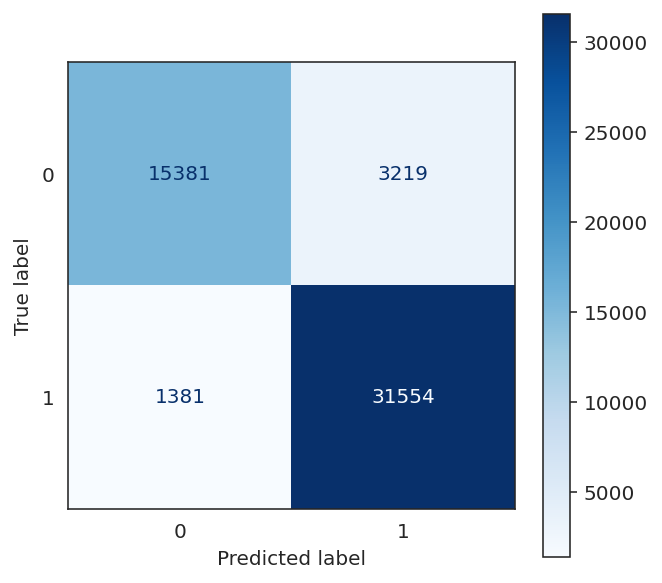

In [ ]:
plt.rcParams['figure.figsize']=5,5
sns.set_style("white")
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

<a id='4_2'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>kNN</b>

In [ ]:
%%time
from sklearn.neighbors import KNeighborsClassifier
start = time.time()
model = KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 3min 22s, sys: 1min 36s, total: 4min 59s
Wall time: 2min 45s


In [ ]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['kNN'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 92.91%
Recall: 92.91%
Precision: 92.93%
F1-Score: 92.92%
time to train: 0.03 s
time to predict: 165.80 s
total: 165.83 s


In [ ]:
plt.rcParams['figure.figsize']=5,5
sns.set_style("white")
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

<a id='4_3'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Decision Tree</b>


In [ ]:
%%time
from sklearn.tree import DecisionTreeClassifier
start = time.time()
model = DecisionTreeClassifier().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

In [ ]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Decision Tree'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

In [ ]:
plt.rcParams['figure.figsize']=5,5
sns.set_style("white")
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

In [ ]:
plt.rcParams['figure.figsize']=10,10
sns.set_style("white")
feat_importances = pd.Series(model.feature_importances_, index=feature_names)
feat_importances = feat_importances.groupby(level=0).mean()
feat_importances.nlargest(20).plot(kind='barh').invert_yaxis()
sns.despine()
plt.show()

<a id='4_4'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Extra Trees</b>

In [ ]:
%%time
from sklearn.ensemble import ExtraTreesClassifier
start = time.time()
model = ExtraTreesClassifier(random_state=0,n_jobs=-1).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

In [ ]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Extra Trees'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

In [ ]:
plt.rcParams['figure.figsize']=5,5
sns.set_style("white")
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

In [ ]:
plt.rcParams['figure.figsize']=10,10
sns.set_style("white")
sns.despine()
feat_importances = pd.Series(model.feature_importances_, index=feature_names)
feat_importances = feat_importances.groupby(level=0).mean()
feat_importances.nlargest(20).plot(kind='barh').invert_yaxis()
sns.despine()
plt.show()

<a id='4_5'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Random Forest</b>

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier
start = time.time()
model = RandomForestClassifier(n_estimators = 100,n_jobs=-1,random_state=0,bootstrap=True,).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

In [ ]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Random Forest'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

In [ ]:
plt.rcParams['figure.figsize']=5,5
sns.set_style("white")
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

In [ ]:
plt.rcParams['figure.figsize']=10,10
sns.set_style("white")
feat_importances = pd.Series(model.feature_importances_, index=feature_names)
feat_importances = feat_importances.groupby(level=0).mean()
feat_importances.nlargest(20).plot(kind='barh').invert_yaxis()
sns.despine()
plt.show()

<a id='4_6'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Gradient Boosting Classifier</b>

In [ ]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
start = time.time()
model = GradientBoostingClassifier().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

In [ ]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Gradient Boosting Classifier'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

In [ ]:
plt.rcParams['figure.figsize']=5,5
sns.set_style("white")
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

In [ ]:
plt.rcParams['figure.figsize']=10,10
sns.set_style("white")
feat_importances = pd.Series(model.feature_importances_, index=feature_names)
feat_importances = feat_importances.groupby(level=0).mean()
feat_importances.nlargest(20).plot(kind='barh').invert_yaxis()
sns.despine()
plt.show()

<a id='4_7'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Neural Network MLP</b>

In [ ]:
%%time
from sklearn.neural_network import MLPClassifier
start = time.time()
model = MLPClassifier(hidden_layer_sizes = (20,20,),
                      activation='relu',
                      solver='adam',
                      batch_size=2000,
                      verbose=0).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

In [ ]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['MLP'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

In [ ]:
plt.rcParams['figure.figsize']=5,5
sns.set_style("white")
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

In [ ]:
model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     'time to train':'{:.1f}',
                                                                     'time to predict':'{:.1f}',
                                                                     'total time':'{:.1f}',
                                                                     })

<a id='4_8'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Neural Network MLP (Keras)</b>

In [ ]:
#Import libraries that will allow you to use keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU
from keras import metrics
!pip install keras-metrics #It doesn't come with Google Colab
import keras_metrics as km #when compiling
import keras
import numpy as np
from numpy import array

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
#Build the feed forward neural network model
def build_model():
    model = Sequential()
    model.add(Dense(20, input_dim=56, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='softmax')) #for multiclass classification
    #Compile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
                  metrics=['accuracy',f1_m,precision_m, recall_m]
                 )
    return model

#institate the model
model = build_model()

#fit the model
start = time.time()
model.fit(X_train, y_train, epochs=200, batch_size=2000,verbose=2)
end_train = time.time()

In [ ]:
#Evaluate the neural network
loss, accuracy, f1s, precision, recall = model.evaluate(X_test, y_test)
end_predict = time.time()
model_performance.loc['MLP (Keras)'] = [accuracy, accuracy, accuracy, accuracy,end_train-start,end_predict-end_train,end_predict-start]

<a id='4_9'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>GRU (Keras)</b>

In [ ]:
#Build the neural network model
def build_model():
    model = Sequential()
    model.add(GRU(20, return_sequences=True,input_shape=(1,56)))
    model.add(GRU(20, return_sequences=True))
    model.add(Dense(10, activation='softmax')) #for multiclass classification
    #Compile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
                  # metrics=['accuracy',f1_m,precision_m, recall_m]
                  metrics=['accuracy']
                 )
    return model

#The GRU input layer must be 3D.
#The meaning of the 3 input dimensions are: samples, time steps, and features.
#reshape input data
X_train_array = array(X_train) #array has been declared in the previous cell
print(len(X_train_array))
X_train_reshaped = X_train_array.reshape(X_train_array.shape[0],1,56)

#reshape output data
X_test_array=  array(X_test)
X_test_reshaped = X_test_array.reshape(X_test_array.shape[0],1,56)


#institate the model
model = build_model()

start = time.time()
#fit the model
model.fit(X_train_reshaped, y_train, epochs=200, batch_size=2000,verbose=2)
end_train = time.time()

In [ ]:
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
# loss, accuracy, f1s, precision, recall = model.evaluate(X_test_reshaped, y_test)
end_predict = time.time()
model_performance.loc['GRU (Keras)'] = [accuracy, accuracy, accuracy, accuracy, end_train-start,end_predict-end_train,end_predict-start]

In [ ]:
np.shape(X)

<a id='4_10'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>LSTM (Keras)</b>

In [ ]:
def build_model():
    model = Sequential()
    model.add(LSTM(20, return_sequences=True,input_shape=(1,56)))
    model.add(LSTM(20, return_sequences=True))
    model.add(Dense(10, activation='softmax')) #for multiclass classification
    #Compile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
                  # metrics=['accuracy',f1_m,precision_m, recall_m]
                  metrics=['accuracy']
                 )
    return model

#The LSTM input layer must be 3D.
#The meaning of the 3 input dimensions are: samples, time steps, and features.
#reshape input data
X_train_array = array(X_train) #array has been declared in the previous cell
print(len(X_train_array))
X_train_reshaped = X_train_array.reshape(X_train_array.shape[0],1,56)

#reshape output data
X_test_array=  array(X_test)
X_test_reshaped = X_test_array.reshape(X_test_array.shape[0],1,56)


#institate the model
model = build_model()


#fit the model
start = time.time()
model.fit(X_train_reshaped, y_train, epochs=200, batch_size=2000,verbose=2)
end_train = time.time()

In [ ]:
#Evaluate the neural network
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
# loss, accuracy, f1s, precision, recall = model.evaluate(X_test_reshaped, y_test)
end_predict = time.time()
model_performance.loc['LSTM (Keras)'] = [accuracy, accuracy, accuracy, accuracy,end_train-start,end_predict-end_train,end_predict-start]

<a id='5'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Evaluate</b>

The models are compared in this chapter to determine which give the best performance. It seems that the winner is the Random Forest with a good performance on speed and prediction.

The MLP takes much longer to train in Keras than through sci-kit learn. I don't think that the verbosity of the output could have such a big impact. It is unclear why Keras is underperforming.

In [ ]:
model_performance.fillna(.90,inplace=True)
model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     'time to train':'{:.1f}',
                                                                     'time to predict':'{:.1f}',
                                                                     'total time':'{:.1f}',
                                                                     })

<a id='6'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Federated Learning</b>

In [ ]:
print(type(y_test))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

def train_random_forest_client(X_train, y_train):
    """Train Random Forest model for a client."""
    model = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1, bootstrap=True)
    model.fit(X_train, y_train)
    return model

def evaluate_random_forest_client(model, X_test, y_test):
    """Evaluate Random Forest model for a client."""
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Training loop with federated rounds
num_clients = 10
num_rounds = 5
client_results = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}

# Split the data into clients
client_data_splits = np.array_split(X_train, num_clients)
client_labels_splits = np.array_split(y_train, num_clients)

global_predictions = []  # Store predictions for global aggregation
global_model = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1, bootstrap=True)  # Initialize a global model

for round in range(num_rounds):
    local_models = []
    local_results = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}

    for client_id in range(num_clients):
        # Train a local model for each client
        local_model = train_random_forest_client(client_data_splits[client_id], client_labels_splits[client_id])
        local_models.append(local_model)

        # Evaluate local model on client data
        acc, pre, rec, f1 = evaluate_random_forest_client(
            local_model,
            client_data_splits[client_id],
            client_labels_splits[client_id]
        )
        local_results['accuracy'].append(acc)
        local_results['precision'].append(pre)
        local_results['recall'].append(rec)
        local_results['f1'].append(f1)

    # Aggregate predictions across all clients
    for client_model in local_models:
        y_preds = client_model.predict(X_test)
        global_predictions.append(y_preds)

    # Aggregate client results for the round
    for metric in local_results:
        client_results[metric].append(np.mean(local_results[metric]))

    print(f"Round {round + 1}/{num_rounds} - "
          f"Accuracy: {client_results['accuracy'][-1]:.4f}, "
          f"Precision: {client_results['precision'][-1]:.4f}, "
          f"Recall: {client_results['recall'][-1]:.4f}, "
          f"F1 Score: {client_results['f1'][-1]:.4f}")

    # **Global Model Aggregation (by averaging the model parameters)**
    global_model = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1, bootstrap=True)  # Reinitialize global model

    # Aggregate weights of client models (simplified approach for demonstration)
    global_model.fit(np.vstack(client_data_splits), np.hstack(client_labels_splits))  # Fit the global model on all client data

# Final Global Aggregation
global_predictions = np.array(global_predictions).mean(axis=0).round()  # Averaging the predictions
global_accuracy = accuracy_score(y_test, global_predictions)
global_precision = precision_score(y_test, global_predictions, average='weighted')
global_recall = recall_score(y_test, global_predictions, average='weighted')
global_f1 = f1_score(y_test, global_predictions, average='weighted')

print(f"Global Model - "
      f"Accuracy: {global_accuracy:.4f}, "
      f"Precision: {global_precision:.4f}, "
      f"Recall: {global_recall:.4f}, "
      f"F1 Score: {global_f1:.4f}")


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def train_random_forest_client(X_train, y_train):
    model = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1, bootstrap=True)
    model.fit(X_train, y_train)
    return model

def evaluate_random_forest_client(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Federated learning parameters
num_clients = 10
num_rounds = 5
client_results = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}

# Split data among clients
client_data_splits = np.array_split(X_train, num_clients)
client_labels_splits = np.array_split(y_train, num_clients)

# Debug data distribution
for i in range(num_clients):
    unique, counts = np.unique(client_labels_splits[i], return_counts=True)
    print(f"Client {i + 1}: Class distribution: {dict(zip(unique, counts))}")

global_predictions = []  # For prediction aggregation
for round in range(num_rounds):
    local_models = []
    local_results = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}

    for client_id in range(num_clients):
        # Train on client data
        local_model = train_random_forest_client(client_data_splits[client_id], client_labels_splits[client_id])
        local_models.append(local_model)

        # Evaluate on client's own data
        acc, pre, rec, f1 = evaluate_random_forest_client(
            local_model,
            client_data_splits[client_id],
            client_labels_splits[client_id]
        )
        local_results['accuracy'].append(acc)
        local_results['precision'].append(pre)
        local_results['recall'].append(rec)
        local_results['f1'].append(f1)

    # Debug individual client performances on global test set
    for i, local_model in enumerate(local_models):
        acc, pre, rec, f1 = evaluate_random_forest_client(local_model, X_test, y_test)
        print(f"Client {i + 1} Test Performance: "
              f"Accuracy: {acc:.4f}, Precision: {pre:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}")

    # Aggregate predictions
    round_predictions = np.zeros_like(y_test)
    for client_model in local_models:
        round_predictions += client_model.predict(X_test)
    round_predictions = np.round(round_predictions / num_clients)

    global_predictions.append(round_predictions)

    # Round metrics
    for metric in local_results:
        client_results[metric].append(np.mean(local_results[metric]))

    print(f"Round {round + 1}/{num_rounds} - "
          f"Accuracy: {client_results['accuracy'][-1]:.4f}, "
          f"Precision: {client_results['precision'][-1]:.4f}, "
          f"Recall: {client_results['recall'][-1]:.4f}, "
          f"F1 Score: {client_results['f1'][-1]:.4f}")

# Final global model evaluation
global_predictions = np.mean(global_predictions, axis=0).round()
global_accuracy = accuracy_score(y_test, global_predictions)
global_precision = precision_score(y_test, global_predictions, average='weighted')
global_recall = recall_score(y_test, global_predictions, average='weighted')
global_f1 = f1_score(y_test, global_predictions, average='weighted')

print(f"Global Model - Accuracy: {global_accuracy:.4f}, Precision: {global_precision:.4f}, "
      f"Recall: {global_recall:.4f}, F1: {global_f1:.4f}")


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from torch.utils.data import DataLoader, TensorDataset
import copy
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Convert datasets to PyTorch tensors and create DataLoader for federated learning
# Convert datasets to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.long)  # Ensure y_train is converted to NumPy array
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.long)    # Ensure y_test is converted to NumPy array

# Split data among clients
num_clients = 20
client_data_splits = np.array_split(X_train_tensor, num_clients)
client_labels_splits = np.array_split(y_train_tensor, num_clients)

# Define the PyTorch neural network model
class MLPModel(nn.Module):
    def __init__(self, input_size=56):  # Adjust input size to match the number of features
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 20)  # Update input size to match the number of features
        self.fc2 = nn.Linear(20, 20)
        self.fc3 = nn.Linear(20, 2)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# Federated learning parameters
num_rounds = 200
num_epochs = 50
batch_size = 128
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()

# Helper function to train client model
def train_client(model, data_loader, optimizer, criterion):
    model.train()
    total_loss = 0
    for inputs, labels in data_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(data_loader)

# Helper function to evaluate client model
def evaluate_client(model, data_loader):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for inputs, labels in data_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    pre = precision_score(all_labels, all_preds)
    rec = recall_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds)
    return acc, pre, rec, f1

# Aggregation Method 1: Weighted Average of Model Weights
def aggregate_models_weighted(global_model, client_models, client_data_sizes):
    total_data = sum(client_data_sizes)
    global_dict = global_model.state_dict()

    for k in global_dict.keys():
        global_dict[k] = torch.stack([client_models[i].state_dict()[k] * (client_data_sizes[i] / total_data) for i in range(len(client_models))], dim=0).sum(dim=0)

    global_model.load_state_dict(global_dict)
    return global_model

# Aggregation Method 2: Weight Difference Between Models
def aggregate_models_difference(global_model, client_models, client_data_sizes):
    total_data = sum(client_data_sizes)
    global_dict = global_model.state_dict()

    for k in global_dict.keys():
        weight_deltas = torch.stack([client_models[i].state_dict()[k] - global_model.state_dict()[k] for i in range(len(client_models))], dim=0)
        global_dict[k] += weight_deltas.mean(dim=0)

    global_model.load_state_dict(global_dict)
    return global_model

# Federated Training Loop
def federated_train(aggregation_type='weighted'):
    global_model = MLPModel()  # Initialize the global model
    client_data_sizes = [len(client_data) for client_data in client_data_splits]
    round_results = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'loss': []}

    for round in range(num_rounds):
        round_results_current = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'loss': []}
        client_models = [copy.deepcopy(global_model) for _ in range(num_clients)]
        client_results = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'loss': []}

        # Local training on each client
        for client_id in range(num_clients):
            client_data = DataLoader(TensorDataset(client_data_splits[client_id], client_labels_splits[client_id]), batch_size=batch_size, shuffle=True)
            optimizer = optim.Adam(client_models[client_id].parameters(), lr=learning_rate)
            client_loss = train_client(client_models[client_id], client_data, optimizer, criterion)
            acc, pre, rec, f1 = evaluate_client(client_models[client_id], client_data)
            client_results['accuracy'].append(acc)
            client_results['precision'].append(pre)
            client_results['recall'].append(rec)
            client_results['f1'].append(f1)
            client_results['loss'].append(client_loss)

        # Aggregate client results for this round
        for metric in client_results:
            round_results_current[metric].append(sum(client_results[metric]) / num_clients)

        # Aggregate the models using the specified method
        if aggregation_type == 'weighted':
            global_model = aggregate_models_weighted(global_model, client_models, client_data_sizes)
        elif aggregation_type == 'difference':
            global_model = aggregate_models_difference(global_model, client_models, client_data_sizes)

        # Store the results for later comparison
        round_results['accuracy'].append(round_results_current['accuracy'][-1])
        round_results['precision'].append(round_results_current['precision'][-1])
        round_results['recall'].append(round_results_current['recall'][-1])
        round_results['f1'].append(round_results_current['f1'][-1])
        round_results['loss'].append(round_results_current['loss'][-1])

        # print(f'Round [{round+1}/{num_rounds}] - Loss: {round_results_current["loss"][-1]:.4f}, Accuracy: {round_results_current["accuracy"][-1]:.4f}, Precision: {round_results_current["precision"][-1]:.4f}, Recall: {round_results_current["recall"][-1]:.4f}, F1 Score: {round_results_current["f1"][-1]:.4f}')

    return global_model, round_results

# Evaluate the global model on test data
def evaluate_model(global_model):
    global_model.eval()
    with torch.no_grad():
        outputs = global_model(X_test_tensor)
        _, predicted = torch.max(outputs, 1)
        accuracy = accuracy_score(y_test_tensor, predicted)
        precision = precision_score(y_test_tensor, predicted)
        recall = recall_score(y_test_tensor, predicted)
        f1 = f1_score(y_test_tensor, predicted)
    return accuracy, precision, recall, f1

# Run federated learning with weighted average aggregation
global_model_weighted, results_weighted = federated_train(aggregation_type='weighted')
accuracy_weighted, precision_weighted, recall_weighted, f1_weighted = evaluate_model(global_model_weighted)
print(f"Final Test Metrics with Weighted Average Aggregation:")
print(f"Accuracy: {accuracy_weighted:.4f}, Precision: {precision_weighted:.4f}, Recall: {recall_weighted:.4f}, F1 Score: {f1_weighted:.4f}")

# Run federated learning with weight difference aggregation
global_model_difference, results_difference = federated_train(aggregation_type='difference')
accuracy_difference, precision_difference, recall_difference, f1_difference = evaluate_model(global_model_difference)
print(f"Final Test Metrics with Weight Difference Aggregation:")
print(f"Accuracy: {accuracy_difference:.4f}, Precision: {precision_difference:.4f}, Recall: {recall_difference:.4f}, F1 Score: {f1_difference:.4f}")

# Compare the results of both aggregation methods
print("\nComparison of Aggregation Methods:")
if accuracy_weighted > accuracy_difference:
    print("Weighted Average Aggregation performed better on accuracy.")
else:
    print("Weight Difference Aggregation performed better on accuracy.")
